Questions: I wanted to look at the different average compensations based on job title, investigate the gender distribution for all STEM jobs as well as specifically data scientists, and how years of experience and years at company affect base salary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("stem_salaries_data.csv")
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
df.groupby("title")["basesalary"].mean()

title
Business Analyst                103505.084746
Data Scientist                  138054.693561
Hardware Engineer               139628.181818
Human Resources                 128590.659341
Management Consultant           136195.696721
Marketing                       140957.746479
Mechanical Engineer             118455.102041
Product Designer                137163.588391
Product Manager                 148663.562166
Recruiter                       117496.674058
Sales                           118470.715835
Software Engineer               132414.623681
Software Engineering Manager    174204.469039
Solution Architect              140173.509075
Technical Program Manager       156454.742940
Name: basesalary, dtype: float64

In [4]:
df.groupby("title")["totalyearlycompensation"].mean()

title
Business Analyst                129727.683616
Data Scientist                  203656.710628
Hardware Engineer               213655.000000
Human Resources                 178711.538462
Management Consultant           162795.081967
Marketing                       198971.830986
Mechanical Engineer             158442.857143
Product Designer                207637.203166
Product Manager                 257813.396105
Recruiter                       155580.931264
Sales                           214273.318872
Software Engineer               205403.992287
Software Engineering Manager    354635.752312
Solution Architect              212736.387208
Technical Program Manager       237099.927589
Name: totalyearlycompensation, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='Count'>

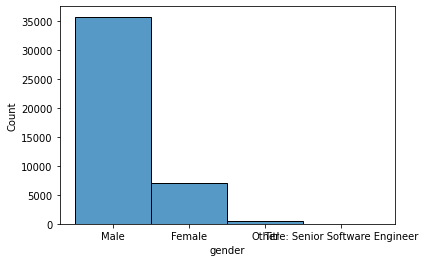

In [5]:
# Distrbution of gender for all STEM jobs in dataset
sns.histplot(data=df["gender"], bins=2)

<AxesSubplot:xlabel='gender', ylabel='Count'>

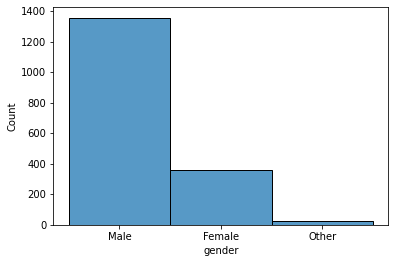

In [6]:
# Distributuon of gender for people with job title of "Data Scientist"
df_ds = df.loc[df["title"] == "Data Scientist", :]
sns.histplot(data=df_ds["gender"], bins=2)

<AxesSubplot:xlabel='yearsofexperience_bins', ylabel='basesalary'>

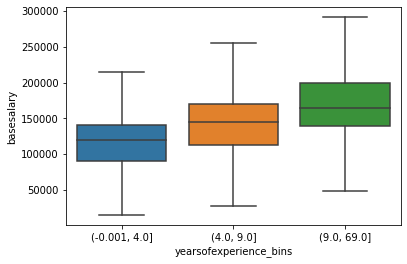

In [16]:
# Base salary for STEM jobs grouped by years of experience
df["yearsofexperience_bins"] = pd.qcut(df["yearsofexperience"], 3)
sns.boxplot(x="yearsofexperience_bins", y="basesalary", showfliers = False, data=df)

<AxesSubplot:xlabel='yearsatcompany_bins', ylabel='basesalary'>

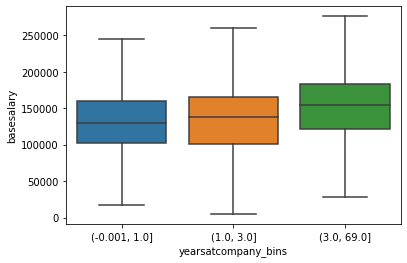

In [17]:
# Base salary for STEM jobs grouped by years at company
df["yearsatcompany_bins"] = pd.qcut(df["yearsatcompany"], 3)
sns.boxplot(x="yearsatcompany_bins", y="basesalary", showfliers = False, data=df)

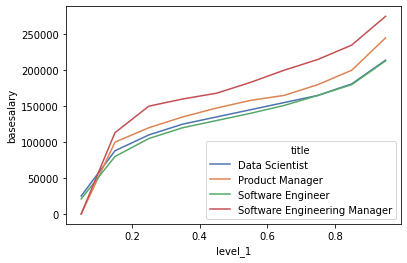

In [14]:
# Quantile plot of salaries for four randomly selected job titles just for fun
dy = df.loc[df["title"].isin(df["title"].unique()[:4]),]
p = np.linspace(0.05, 0.95, 10)
qw = dy.groupby("title")["basesalary"].quantile(p).reset_index()
ax = sns.lineplot(x='level_1', y='basesalary', hue = 'title', palette='deep', data=qw)